In [4]:
import skimage.data
import selectivesearch
import cv2
import numpy as np
from matplotlib import pyplot as plt
##
import skimage.io
import skimage.feature
import skimage.color
import skimage.transform
import skimage.util
import skimage.segmentation
import numpy
from skimage.segmentation import mark_boundaries

In [24]:
def ss(img, sigma = 1, min_size = 300):
    ##
    #img = cv2.resize(img, (720, 526))
    img_lbl, regions = selectivesearch.selective_search(img, scale=500, sigma=sigma, min_size=min_size)
    print("no:regions found " + str(len(regions)))
    #for i in regions:
    #    print(i)

    ###
    coor = []
    count = 0
    for i in regions:
        if count == 500:
            break
        coor.append(str(i)[10:])

    ###
    co = []
    for i in coor:
        x = ""
        for j in i:
            if j != ")" :
                x = x+j
            else:
                break
        co.append(x)
    ###
    c = []
    for i in co:
        x = list(map(int,i.split(",")))
        c.append(x)
    
    ## cv2.rectangle() method

    # Reading an image in grayscale mode
    #image = cv2.imread(path)

    # Window name in which image is displayed
    window_name = 'Image'
    count = 0
    for i in c:
        if count == 500:
            break
        count +=1
    
        left = i[0]
        top = i[1]
    
    
    # Start coordinate, here (100, 50)
    # represents the top left corner of rectangle
        start_point = (i[0] , i[1])


    # Ending coordinate, here (125, 80)
    # represents the bottom right corner of rectangle
        end_point = (i[2] +i[0] , i[1]+i[3])

    # Black color in BGR
        color = (0, 255 , 0)

    # Line thickness of -1 px
    # Thickness of -1 will fill the entire shape
        thickness = 2

    # Using cv2.rectangle() method
    # Draw a rectangle of black color of thickness -1 px
    
        image = cv2.rectangle(img, start_point, end_point, color, thickness)

    # Displaying the image
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,20)) 
    plt.imshow(rgb_img)
    #plt.title("Regions found " + str(len(regions)))
    plt.show()

no:regions found 355


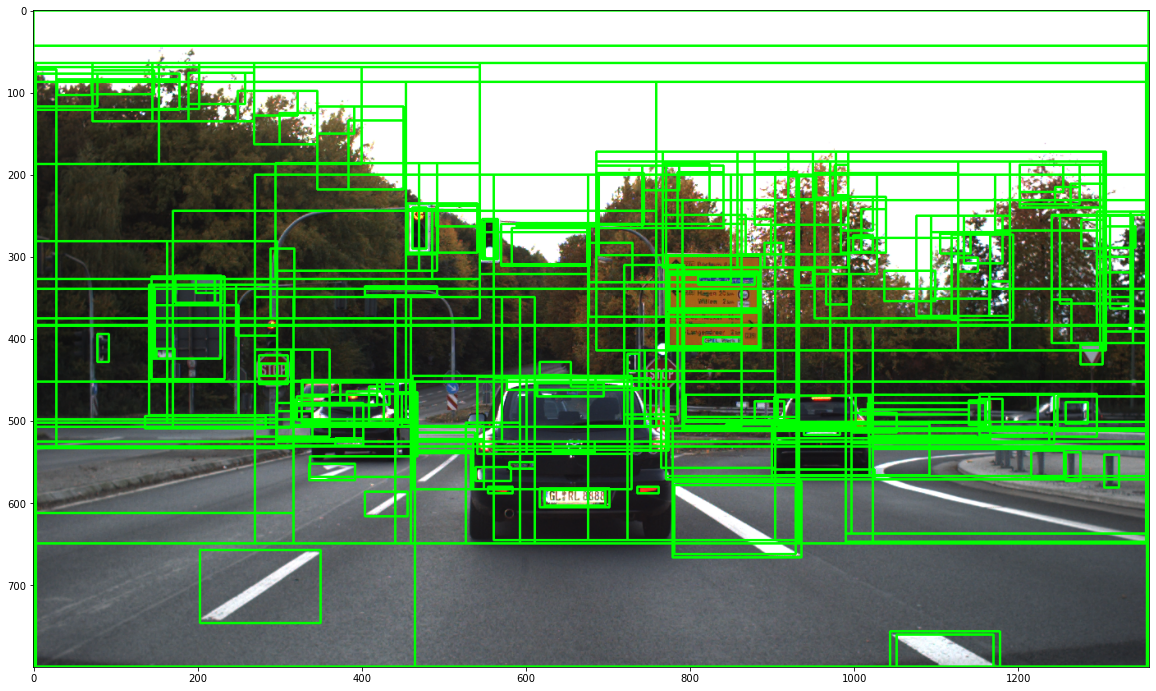

In [28]:
# path

path = 'TrainIJCNN2013/00177.ppm'
img = cv2.imread(path)
ss(img, 0.9 , 200)

Text(0.5, 1.0, 'original')

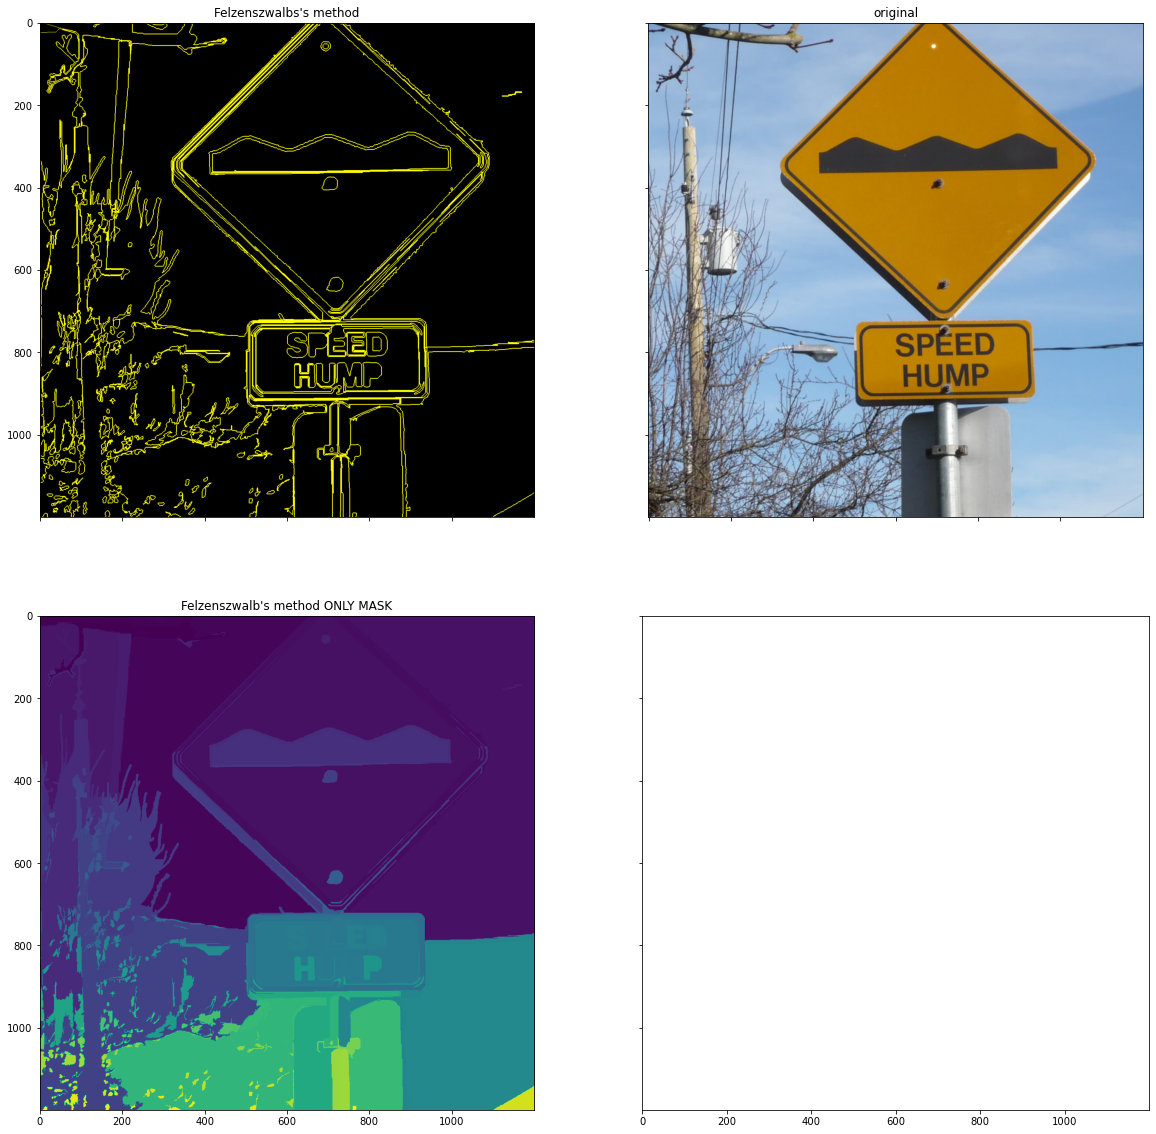

In [13]:
path = 'Test_SS_imgs/test1.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_mask = skimage.segmentation.felzenszwalb(
        skimage.util.img_as_float(img), scale=700, sigma= 1,
        min_size= 50)

fig, ax = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)

#####
white_img  = np.zeros(img.shape,dtype=np.uint8)
white_img.fill(0)
#####

bound_img = mark_boundaries(white_img, im_mask)
ax[0,0].imshow(bound_img)
ax[0,0].set_title("Felzenszwalbs's method")
ax[1,0].imshow(im_mask)
ax[1,0].set_title("Felzenszwalb's method ONLY MASK")
ax[0,1].imshow(img)
ax[0,1].set_title("original")

In [14]:
bound_img.shape

(1200, 1200, 3)